In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_regression(n_features=1, bias=100, noise=10, random_state=42)

In [3]:
X.shape

(100, 1)

In [4]:
y.shape

(100,)

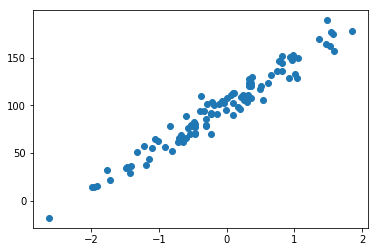

In [5]:
plt.scatter(X, y)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

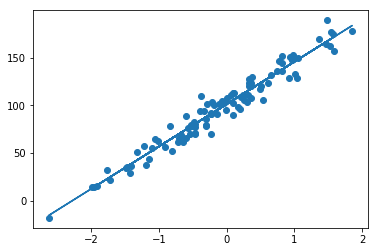

In [9]:
plt.scatter(X, y)
plt.plot(X, model.predict(X))


In [47]:
class LinearRegCustom:
    
    def __init__(self):
        pass
        
    def fit(self, X, y):
        self._X = self.modify_X(X)
        self._y = y.reshape(-1, 1)
        
        self.theta_ = self.get_theta()
        
        print(self.theta_)
        self.intercept = self.theta_.flatten()[0]
        self.coef_ = self.theta_.flatten()[1:]
        
        
    def get_theta(self):
        first = np.dot(self._X.T, self._X)
        second = np.dot(self._X.T, self._y)
        
        return np.dot(np.linalg.inv(first), second)
    
    def modify_X(self, X):
        ones = np.ones([X.shape[0], 1])
        return np.hstack([ones, X])

    def hypothesis(self, X):
        X = self.modify_X(X)
        return np.dot(X, self.theta_)

    def predict(self, X):
        return self.hypothesis(X).flatten()
    
    def error(self):
        ya = self._y
        yp = self.hypothesis(self._X)
        
        return ((yp-ya)**2).mean()
    
    
        

In [48]:
model = LinearRegCustom()
model.fit(X, y)

[[101.16511532]
 [ 44.43716999]]


In [49]:
model.coef_

array([44.43716999])

In [50]:
model.intercept

101.165115320527

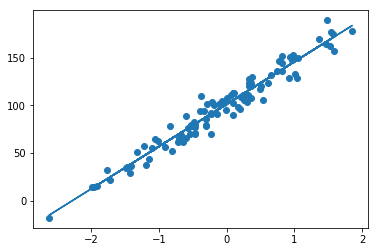

In [53]:
plt.scatter(X, y)
plt.plot(X, model.predict(X))